In [ ]:
# Imports + settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

pd.set_option('display.max_columns', None)


In [ ]:
df_survey = pd.read_csv('/content/ALPR General Survey Results.csv')

In [ ]:
df_survey

,Run,Program Version,User,Time Started (UTC),Time Finished (UTC),Minutes Spent,Position,Points,testing question? (8vufenf),"Have you noticed surveillance technologies in your neighborhood that were installed by the government, police, or private businesses (not personal home cameras like Ring or Nest)? (lw3083d)",What is your ZIP code? (7bepp7b),participantID,assignmentID,projectID,startedAt,computerCountry,computerID,device,Which of the following surveillance tools have you heard of or seen in your city? (Select all that apply) (8dl9hmt),"How concerned are you about surveillance technology in public spaces like streets, sidewalks, or public transit? (n15scu9)",How often do you notice surveillance cameras or sensors in your neighborhood or daily routine? (6itkmu),How familiar are you with how automatic license plate reader (ALPR) cameras work? (724al0n),"After being approved by local governments, private companies like Flock Safety install Automatic License Plate Reader (ALPR) cameras in neighborhoods and share data with police. Before today, how aware were you of that fact? (50mnfkf)","In some Bay Area cities, Automatic License Plate Reader (ALPR) cameras store an image of your license plate, vehicle make and model, and location in a searchable database for up to 12 months every time you drive past one. Before today, how aware were you of that fact? (6s6r3ex)","Police can search the Automatic License Plate Reader (ALPR) database for your data without a warrant or approval from any other organization. Before today, how aware were you of that fact? (zke2ete)","Police can legally share your license plate Automatic License Plate Reader (ALPR) data with other local governments/police departments within California at any time without a warrant. Before today, how aware were you of that fact? (skzr4a8)","The image above shows locations and number of Automatic License Plate Reader (ALPR) cameras in the Bay Area reported by residents. Actual locations and counts may vary, but there is likely to be more installed than shown in the image. Before today, how aware were you of the number of ALPR cameras in the Bay Area? (3eg0nl6)",How supportive are you of Automatic License Plate Reader (ALPR) cameras installed by local governments and used by law enforcement? (y7ka0mc),How supportive are you of private individuals or businesses installing Automatic License Plate Reader (ALPR) cameras and sharing the data voluntarily with police? (uktyzgu),Have you ever felt uncomfortable or treated unfairly due to surveillance technology? (5bdjc2c),"How concerned are you that surveillance technologies may harm others (e.g., unhoused people, immigrants, protesters), even if they don’t affect you personally? (gvrrsub)",Do you believe surveillance is being used more for public safety or social control? (cfu4j56),Which of the following groups should have access to surveillance data? (Select all that apply) (bgnrn84),Who do you trust to make decisions about how surveillance is used in your city? (Select all that apply) (w02ux9i),How important is it to you that the public has input or oversight before new surveillance technologies are adopted? (ttzmqna),"How likely do you think it is that police would share Automatic License Plate Reader (ALPR) data with federal agencies, even if not legally allowed? (gnnu4ft)",It’s okay for police to track and store the location data of people who haven’t done anything wrong. (nd9oynf),"Surveillance technologies such as ALPRs disproportionately impact marginalized communities (e.g., by race, income, housing status, or immigration status)? (f1j1olu)",Surveillance technologies such as ALPRs increase public safety. (u84m4pd),What should be done about ALPRs in your city? Select all that apply (vwzlz5r),What is your race or ethnicity? (Select all that apply) (d8morv7),How did you find this survey? (yyxwhnl),age,gender,education,yearOfBirth,educationScore,politicalViews,householdIncome,femaleAs1MaleAs0,politicalLiberalness,householdI

In [ ]:
# count of which rows are not nans
not_nan_count = df_survey['How did surveillance make you feel or impact you? (urjiu1g)'].notna().sum()
print(not_nan_count)

93


In [ ]:
df_survey.columns

Index(['Run', 'Program Version', 'User', 'Time Started (UTC)',
       'Time Finished (UTC)', 'Minutes Spent', 'Position', 'Points',
       'testing question? (8vufenf)',
       'Have you noticed surveillance technologies in your neighborhood that were installed by the government, police, or private businesses (not personal home cameras like Ring or Nest)? (lw3083d)',
       'What is your ZIP code? (7bepp7b)', 'participantID', 'assignmentID',
       'projectID', 'startedAt', 'computerCountry', 'computerID', 'device',
       'Which of the following surveillance tools have you heard of or seen in your city? (Select all that apply) (8dl9hmt)',
       'How concerned are you about surveillance technology in public spaces like streets, sidewalks, or public transit? (n15scu9)',
       'How often do you notice surveillance cameras or sensors in your neighborhood or daily routine? (6itkmu)',
       'How familiar are you with how automatic license plate reader (ALPR) cameras work? (724al0n)',
   

In [ ]:
# Do people who support ALPRs believe they can harm certain marginalized groups?

# Fix long title lol
df = df_survey.rename(columns={
    'How supportive are you of Automatic License Plate Reader (ALPR) cameras installed by local governments and used by law enforcement? (y7ka0mc)': 'support_gov',
    'How supportive are you of private individuals or businesses installing Automatic License Plate Reader (ALPR) cameras and sharing the data voluntarily with police? (uktyzgu)': 'support_private',
    'Surveillance technologies such as ALPRs disproportionately impact marginalized communities (e.g., by race, income, housing status, or immigration status)? (f1j1olu)': 'harm_belief',
    'How concerned are you that surveillance technologies may harm others (e.g., unhoused people, immigrants, protesters), even if they don’t affect you personally? (gvrrsub)': 'concern_others'
})

# List of columns
cols = ['support_gov', 'support_private', 'harm_belief', 'concern_others']

# Unique vals
for col in cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


NameError: name 'df_survey' is not defined

In [ ]:
# NAN count
nan_counts = df[cols].isna().sum()
non_nan_counts = df[cols].notna().sum()

# View
summary = pd.DataFrame({
    'Non-NaN Count': non_nan_counts,
    'NaN Count': nan_counts
})

print(summary)

                 Non-NaN Count  NaN Count
support_gov                407         15
support_private            407         15
harm_belief                404         18
concern_others             407         15


In [ ]:
# Remove NaNs
df = df.dropna(subset=cols)

In [ ]:
def extract_numeric(val):
    if pd.isna(val):
        return None
    return int(str(val).split('=')[0].strip())

for col in ['support_gov', 'support_private', 'harm_belief', 'concern_others']:
    df[col + '_num'] = df[col].apply(extract_numeric)


In [ ]:
df = df[
    df['support_gov_num'].between(1, 5) &
    df['harm_belief_num'].between(1, 5)
]

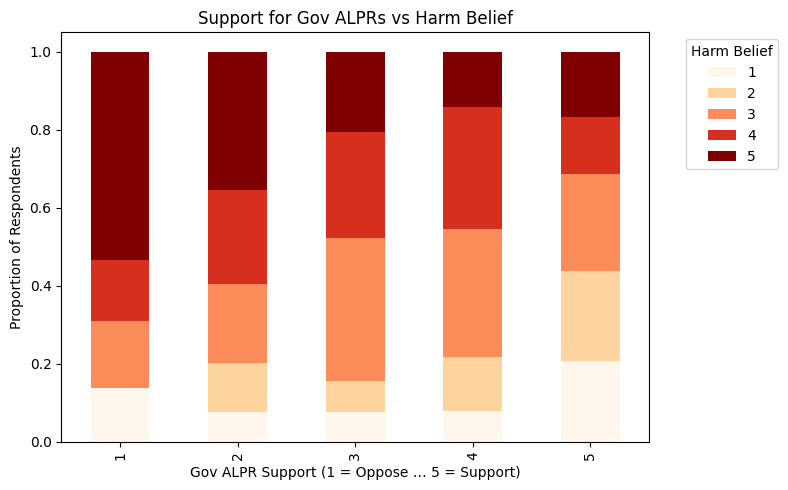

In [ ]:
ct = pd.crosstab(df['support_gov_num'], df['harm_belief_num'], normalize='index')

# Plot
ax = ct.plot(kind='bar', stacked=True, cmap='OrRd', figsize=(8, 5))
ax.set_title("Support for Gov ALPRs vs Harm Belief")
ax.set_xlabel("Gov ALPR Support (1 = Oppose … 5 = Support)")
ax.set_ylabel("Proportion of Respondents")
ax.legend(title="Harm Belief", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

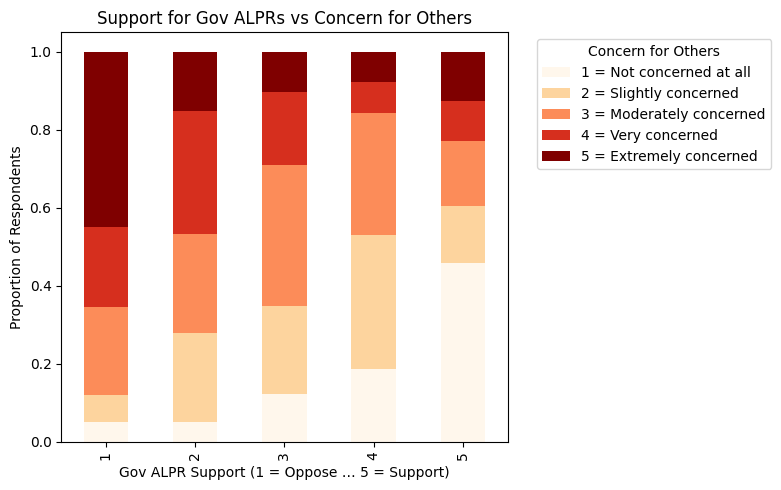

In [ ]:
ct = pd.crosstab(df['support_gov_num'], df['concern_others'], normalize='index')

# Plot
ax = ct.plot(kind='bar', stacked=True, cmap='OrRd', figsize=(8, 5))
ax.set_title("Support for Gov ALPRs vs Concern for Others")
ax.set_xlabel("Gov ALPR Support (1 = Oppose … 5 = Support)")
ax.set_ylabel("Proportion of Respondents")
ax.legend(title="Concern for Others", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

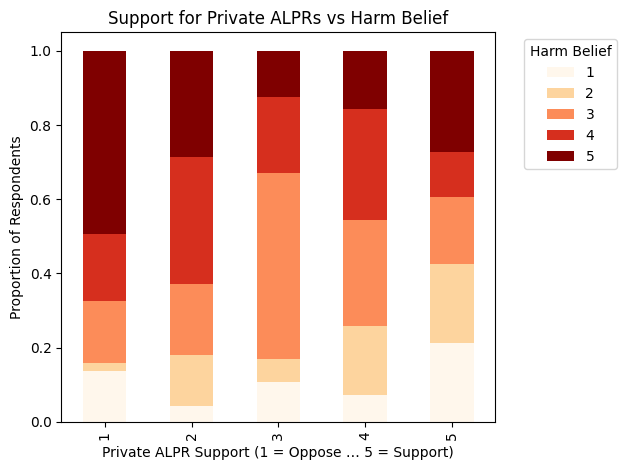

In [ ]:
# Crosstab and plot for private ALPRs vs harm_belief
ct = pd.crosstab(df['support_private_num'], df['harm_belief_num'], normalize='index')
ct.plot(kind='bar', stacked=True, cmap='OrRd')
plt.title("Support for Private ALPRs vs Harm Belief")
plt.xlabel("Private ALPR Support (1 = Oppose … 5 = Support)")
plt.ylabel("Proportion of Respondents")
plt.legend(title="Harm Belief", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


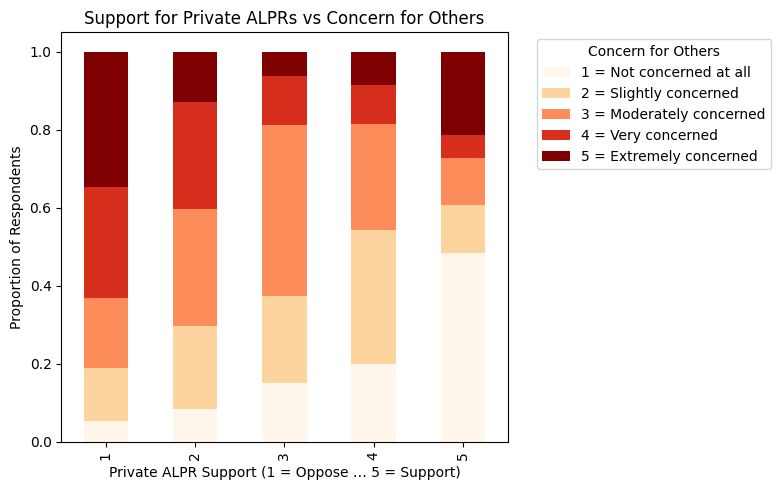

In [ ]:
ct = pd.crosstab(df['support_private_num'], df['concern_others'], normalize='index')

ax = ct.plot(kind='bar', stacked=True, cmap='OrRd', figsize=(8, 5))
ax.set_title("Support for Private ALPRs vs Concern for Others")
ax.set_xlabel("Private ALPR Support (1 = Oppose … 5 = Support)")
ax.set_ylabel("Proportion of Respondents")
ax.legend(title="Concern for Others", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

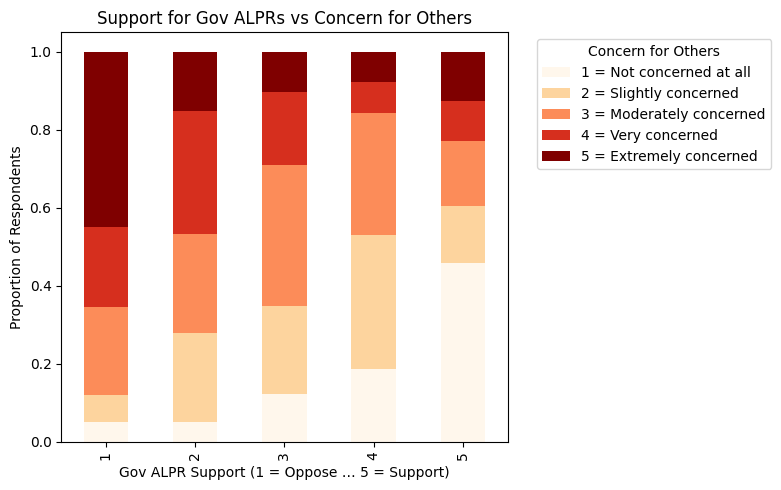

In [ ]:
ct = pd.crosstab(df['support_gov_num'], df['concern_others'], normalize='index')

ax = ct.plot(kind='bar', stacked=True, cmap='OrRd', figsize=(8, 5))
ax.set_title("Support for Gov ALPRs vs Concern for Others")
ax.set_xlabel("Gov ALPR Support (1 = Oppose … 5 = Support)")
ax.set_ylabel("Proportion of Respondents")
ax.legend(title="Concern for Others", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

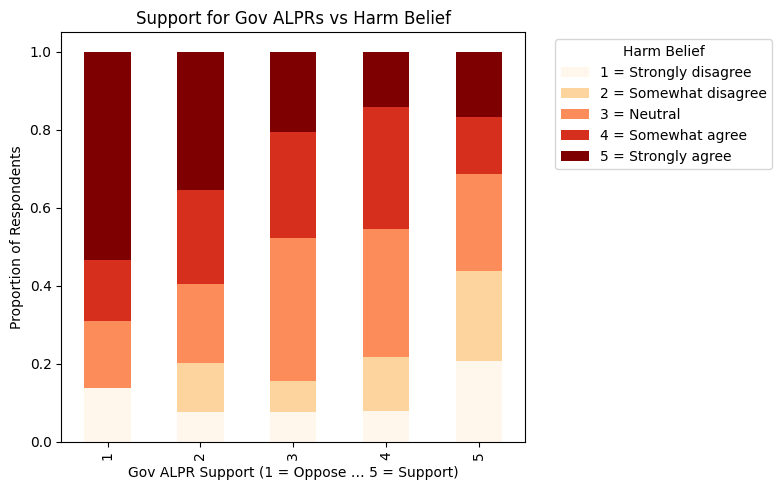

In [ ]:
ct = pd.crosstab(df['support_gov_num'], df['harm_belief_num'], normalize='index')

harm_belief_labels = {
    1: '1 = Strongly disagree',
    2: '2 = Somewhat disagree',
    3: '3 = Neutral',
    4: '4 = Somewhat agree',
    5: '5 = Strongly agree'
}

ct.columns = [harm_belief_labels.get(col, str(col)) for col in ct.columns]

ax = ct.plot(kind='bar', stacked=True, cmap='OrRd', figsize=(8, 5))
ax.set_title("Support for Gov ALPRs vs Harm Belief")
ax.set_xlabel("Gov ALPR Support (1 = Oppose … 5 = Support)")
ax.set_ylabel("Proportion of Respondents")
ax.legend(title="Harm Belief", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


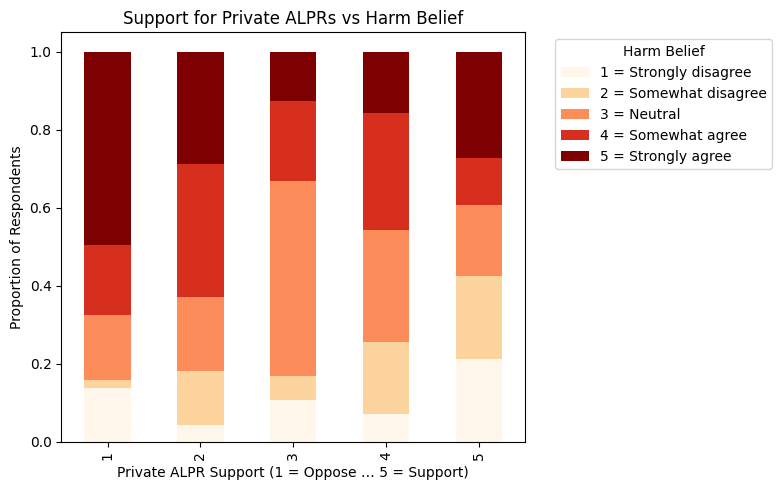

In [ ]:
ct = pd.crosstab(df['support_private_num'], df['harm_belief_num'], normalize='index')

harm_belief_labels = {
    1: '1 = Strongly disagree',
    2: '2 = Somewhat disagree',
    3: '3 = Neutral',
    4: '4 = Somewhat agree',
    5: '5 = Strongly agree'
}

ct.columns = [harm_belief_labels.get(col, str(col)) for col in ct.columns]

ax = ct.plot(kind='bar', stacked=True, cmap='OrRd', figsize=(8, 5))
ax.set_title("Support for Private ALPRs vs Harm Belief")
ax.set_xlabel("Private ALPR Support (1 = Oppose … 5 = Support)")
ax.set_ylabel("Proportion of Respondents")
ax.legend(title="Harm Belief", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


/tmp/ipython-input-5001354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


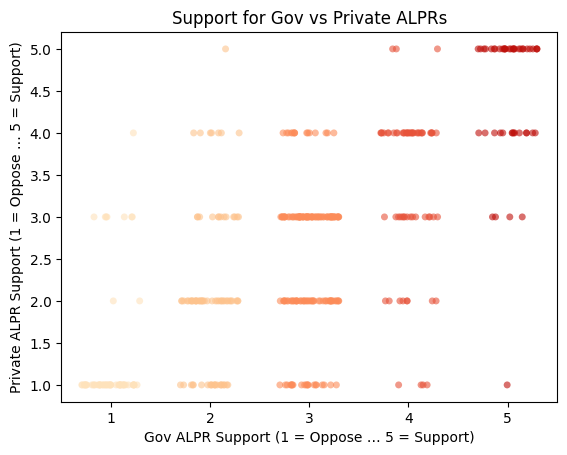

In [ ]:
sns.stripplot(
    x='support_gov_num',
    y='support_private_num',
    data=df,
    jitter=0.3,
    alpha=0.6,
    palette='OrRd'
)
plt.xlabel("Gov ALPR Support (1 = Oppose … 5 = Support)")
plt.ylabel("Private ALPR Support (1 = Oppose … 5 = Support)")
plt.title("Support for Gov vs Private ALPRs")
plt.show()


In [ ]:
df['support_diff'] = df['support_gov_num'] - df['support_private_num']

print(df['support_diff'].value_counts().sort_index())


support_diff
-3      2
-2     14
-1     33
 0    219
 1     98
 2     33
 3      4
 4      1
Name: count, dtype: int64


In [ ]:
# Create binary columns for race/ethnicity
race_dummies = df['What is your race or ethnicity? (Select all that apply) (d8morv7)'].str.get_dummies(sep=', ')
race_dummies.columns = ['race_' + col.strip().replace(" ", "_").replace("/", "_") for col in race_dummies.columns]
df = pd.concat([df, race_dummies], axis=1)


In [ ]:
df.groupby('gender')[['support_gov_num', 'support_private_num', 'harm_belief_num', 'concern_others_num']].mean()


,support_gov_num,support_private_num,harm_belief_num,concern_others_num
gender,,,,
female,2.846512,2.567442,3.572093,3.069767
male,2.989362,2.718085,3.345745,2.914894
other,3.000000,1.000000,4.000000,4.000000


In [ ]:
df.groupby('race_White')[['support_gov_num', 'harm_belief_num']].mean()


,support_gov_num,harm_belief_num
race_White,,
0,2.879195,3.520134
1,3.009434,3.320755


In [ ]:
# Demographic columns
cat_cols = [
    'gender',
    'education',
    'politicalViews',
    'What is your race or ethnicity? (Select all that apply) (d8morv7)',
]

# Unique vals
for col in cat_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].dropna().unique())



Unique values in 'gender':
['female' 'male' 'other']

Unique values in 'education':
['completedOnlyHighSchoolOrTheEquivalent' 'completedBachelorsDegree'
 'completedTradeTechicalVocationalTraing' 'completedDoctorateDegree'
 'completedAssociateDegreeOnly' 'completedMastersDegree'
 'completedProfessionalDegree' 'nurseryTo8thGrade'
 'noSchoolingAtAllCompleted']

Unique values in 'politicalViews':
['Moderate' 'Conservative' 'Very liberal' 'Liberal' 'Very conservative']

Unique values in 'What is your race or ethnicity? (Select all that apply) (d8morv7)':
['White' 'Asian or Pacific Islander' 'Black or African American'
 'Black or African American,Asian or Pacific Islander,Native American or Indigenous'
 'Hispanic or Latino'
 'Black or African American,Native American or Indigenous,White'
 'Hispanic or Latino,White,Middle Eastern or North African'
 'Native American or Indigenous' 'Prefer not to say'
 'Hispanic or Latino,Asian or Pacific Islander' 'Hispanic or Latino,White'
 'Another race or 

In [ ]:
df['gender_female'] = (df['gender'] == 'female').astype(int)
df['gender_other'] = (df['gender'] == 'other').astype(int)

In [ ]:
edu_map = {
    'noSchoolingAtAllCompleted': 0,
    'nurseryTo8thGrade': 1,
    'completedOnlyHighSchoolOrTheEquivalent': 2,
    'completedTradeTechicalVocationalTraing': 3,
    'completedAssociateDegreeOnly': 4,
    'completedBachelorsDegree': 5,
    'completedMastersDegree': 6,
    'completedProfessionalDegree': 7,
    'completedDoctorateDegree': 8
}
df['education_ord'] = df['education'].map(edu_map)


In [ ]:
pol_map = {
    'Very conservative': 1,
    'Conservative': 2,
    'Moderate': 3,
    'Liberal': 4,
    'Very liberal': 5
}
df['political_ord'] = df['politicalViews'].map(pol_map)


In [ ]:
race_dummies = df['What is your race or ethnicity? (Select all that apply) (d8morv7)'].str.get_dummies(sep=', ')
race_dummies.columns = ['race_' + col.strip().replace(" ", "_").replace("/", "_") for col in race_dummies.columns]
df = pd.concat([df, race_dummies], axis=1)


In [ ]:
# Too many mixed races... simplify?

def collapse_primary_race(val):
    if pd.isna(val): return 'Unknown'
    if 'Black or African American' in val: return 'Black'
    elif 'Hispanic or Latino' in val: return 'Latinx'
    elif 'Asian or Pacific Islander' in val: return 'Asian'
    elif 'White' in val: return 'White'
    elif 'Native American or Indigenous' in val: return 'Indigenous'
    elif 'Middle Eastern or North African' in val: return 'MENA'
    elif 'Another race or ethnicity' in val: return 'Other'
    elif 'Prefer not to say' in val: return 'Prefer not to say'
    else: return 'Multiracial'

df['race_collapsed'] = df['What is your race or ethnicity? (Select all that apply) (d8morv7)'].apply(collapse_primary_race)


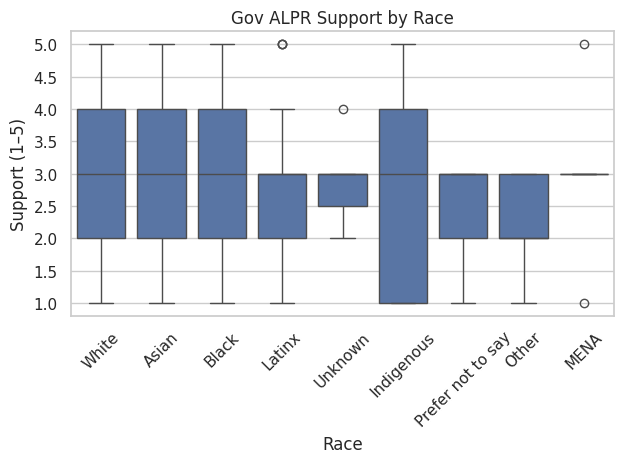

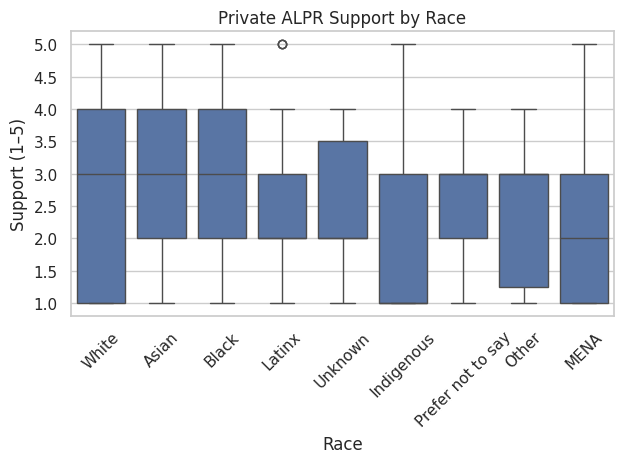

In [ ]:
# Set common styling
sns.set(style="whitegrid")

sns.boxplot(x='race_collapsed', y='support_gov_num', data=df)
plt.title("Gov ALPR Support by Race")
plt.xlabel("Race")
plt.ylabel("Support (1–5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.boxplot(x='race_collapsed', y='support_private_num', data=df)
plt.title("Private ALPR Support by Race")
plt.xlabel("Race")
plt.ylabel("Support (1–5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


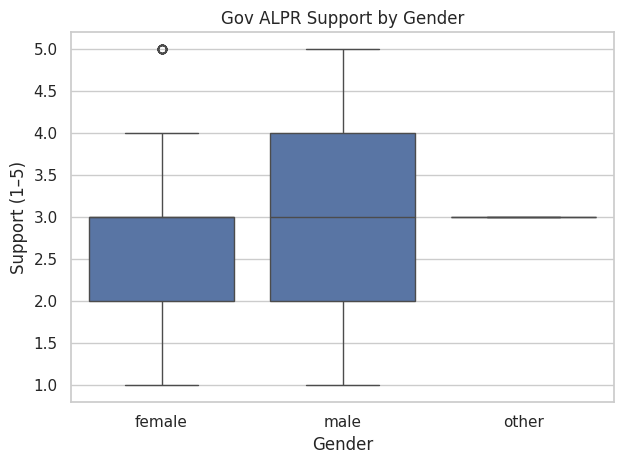

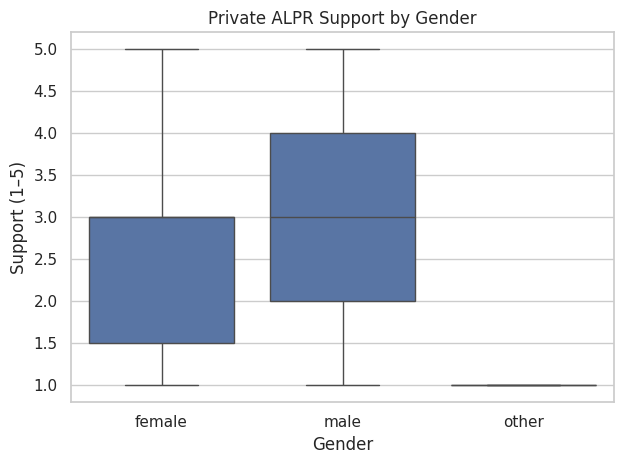

In [ ]:
sns.boxplot(x='gender', y='support_gov_num', data=df)
plt.title("Gov ALPR Support by Gender")
plt.xlabel("Gender")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()

sns.boxplot(x='gender', y='support_private_num', data=df)
plt.title("Private ALPR Support by Gender")
plt.xlabel("Gender")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()


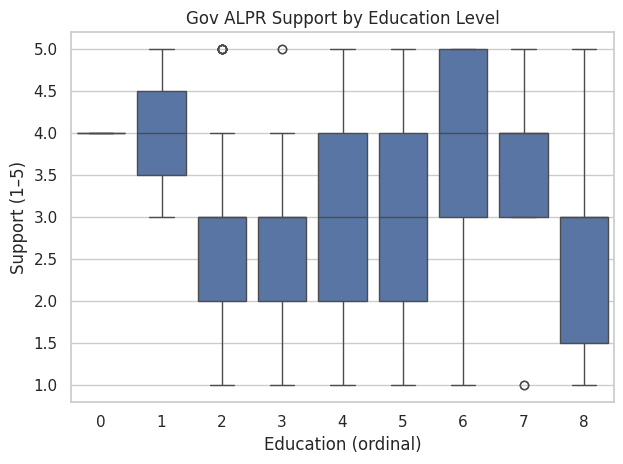

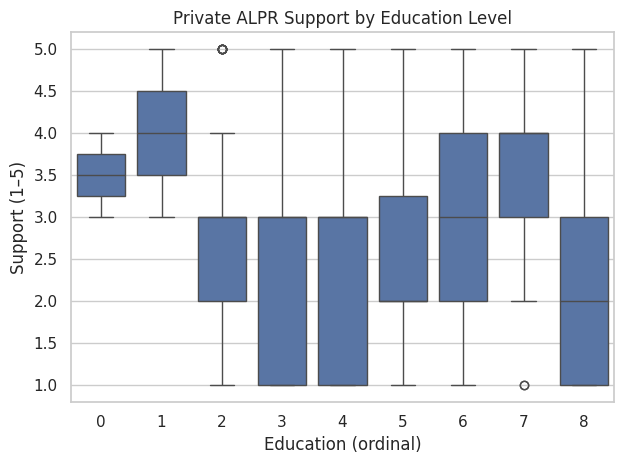

In [ ]:
sns.boxplot(x='education_ord', y='support_gov_num', data=df)
plt.title("Gov ALPR Support by Education Level")
plt.xlabel("Education (ordinal)")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()

sns.boxplot(x='education_ord', y='support_private_num', data=df)
plt.title("Private ALPR Support by Education Level")
plt.xlabel("Education (ordinal)")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()


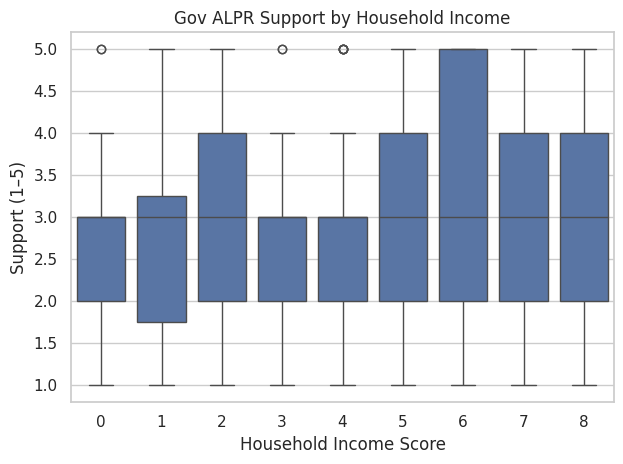

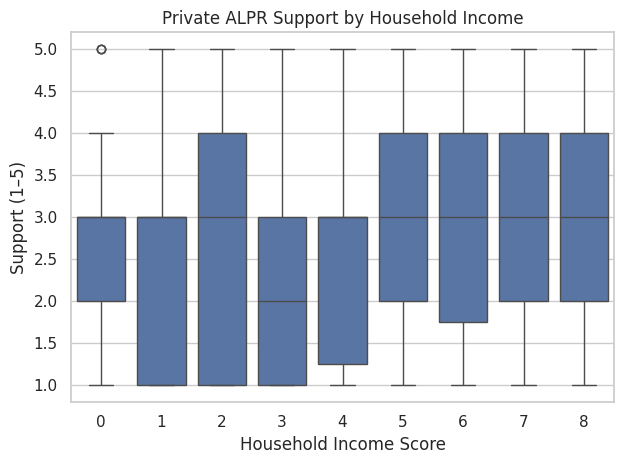

In [ ]:
sns.boxplot(x='householdIncomeScore', y='support_gov_num', data=df)
plt.title("Gov ALPR Support by Household Income")
plt.xlabel("Household Income Score")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()

sns.boxplot(x='householdIncomeScore', y='support_private_num', data=df)
plt.title("Private ALPR Support by Household Income")
plt.xlabel("Household Income Score")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()


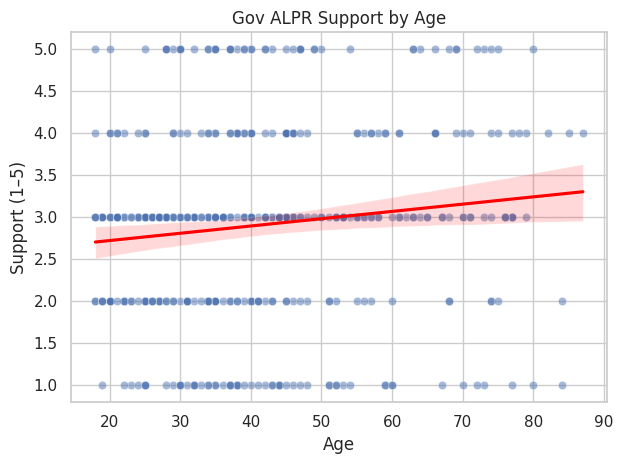

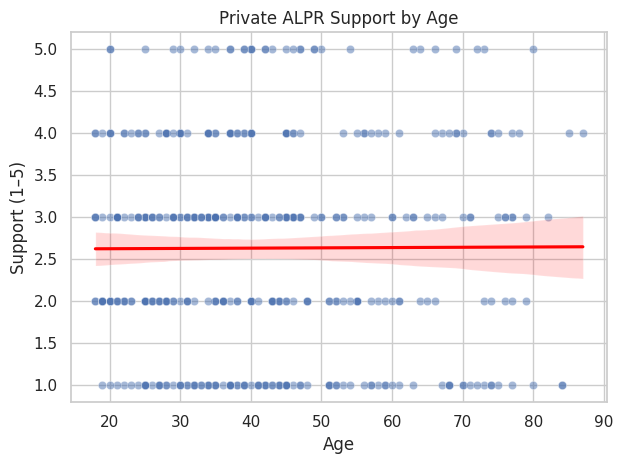

In [ ]:
sns.scatterplot(x='age', y='support_gov_num', data=df, alpha=0.5)
sns.regplot(x='age', y='support_gov_num', data=df, scatter=False, color='red')
plt.title("Gov ALPR Support by Age")
plt.xlabel("Age")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()

sns.scatterplot(x='age', y='support_private_num', data=df, alpha=0.5)
sns.regplot(x='age', y='support_private_num', data=df, scatter=False, color='red')
plt.title("Private ALPR Support by Age")
plt.xlabel("Age")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()


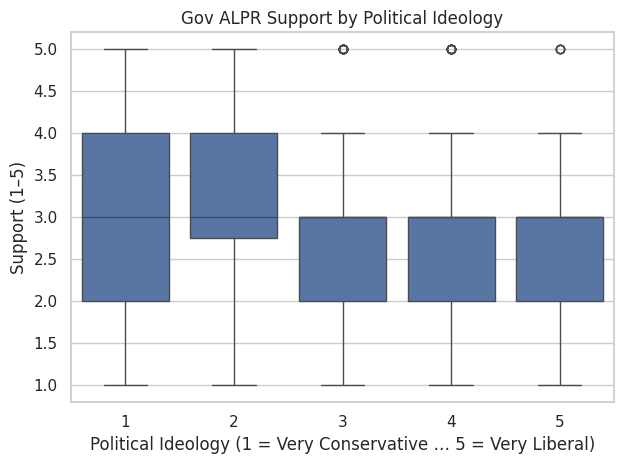

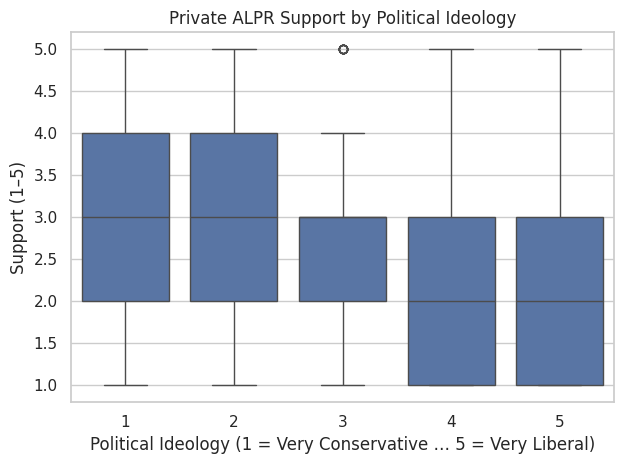

In [ ]:
# Gov ALPR support by political ideology
sns.boxplot(x='political_ord', y='support_gov_num', data=df)
plt.title("Gov ALPR Support by Political Ideology")
plt.xlabel("Political Ideology (1 = Very Conservative … 5 = Very Liberal)")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()

# Private ALPR support by political ideology
sns.boxplot(x='political_ord', y='support_private_num', data=df)
plt.title("Private ALPR Support by Political Ideology")
plt.xlabel("Political Ideology (1 = Very Conservative … 5 = Very Liberal)")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()


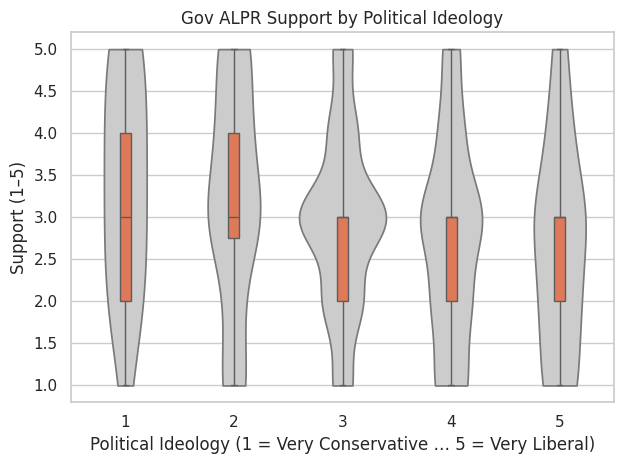

NameError: name 'MaxNLocator' is not defined

In [ ]:
sns.violinplot(x='political_ord', y='support_gov_num', data=df, inner=None, color=".8", cut =0)
sns.boxplot(x='political_ord', y='support_gov_num', data=df, whis=[0, 100], width=0.1, color="#f46d43")

plt.title("Gov ALPR Support by Political Ideology")
plt.xlabel("Political Ideology (1 = Very Conservative … 5 = Very Liberal)")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()



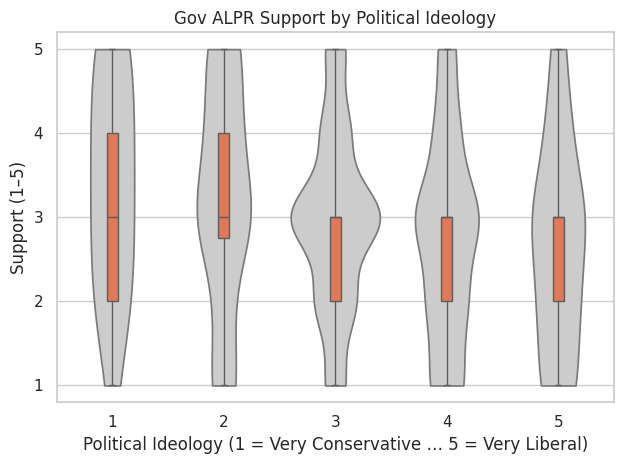

In [ ]:
from matplotlib.ticker import MaxNLocator

sns.violinplot(
    x='political_ord', y='support_gov_num',
    data=df, inner=None, color=".8", cut=0
)
sns.boxplot(
    x='political_ord', y='support_gov_num',
    data=df, whis=[0, 100], width=0.1, color="#f46d43"
)

plt.title("Gov ALPR Support by Political Ideology")
plt.xlabel("Political Ideology (1 = Very Conservative … 5 = Very Liberal)")
plt.ylabel("Support (1–5)")

# force y-axis ticks to be integers
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


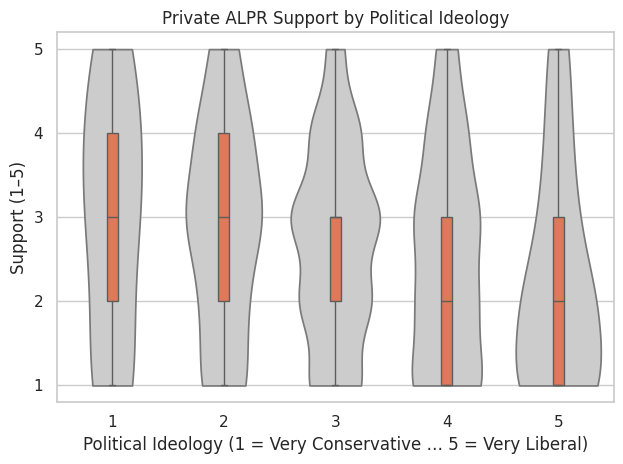

In [ ]:
sns.violinplot(
    x='political_ord', y='support_private_num',
    data=df, inner=None, color=".8", cut=0
)
sns.boxplot(
    x='political_ord', y='support_private_num',
    data=df, whis=[0, 100], width=0.1, color="#f46d43"
)

plt.title("Private ALPR Support by Political Ideology")
plt.xlabel("Political Ideology (1 = Very Conservative … 5 = Very Liberal)")
plt.ylabel("Support (1–5)")

#force y-axis ticks to be integers
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


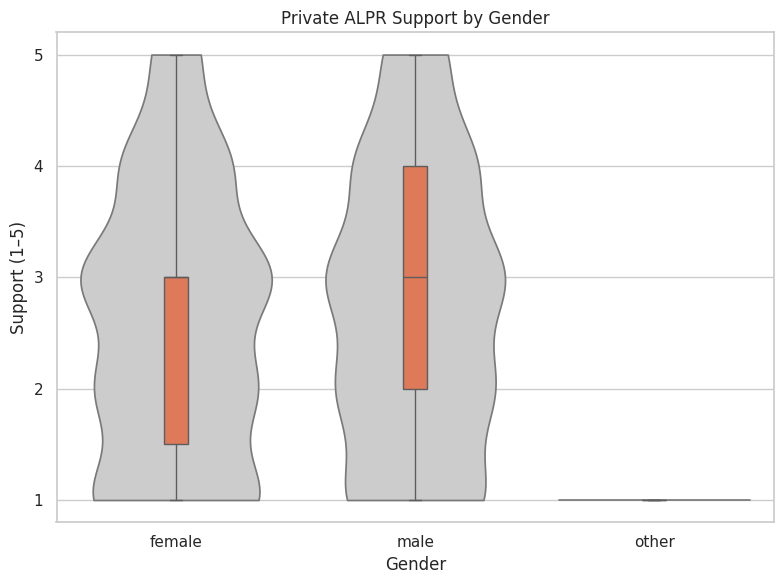

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(8, 6))

sns.violinplot(
    x='gender',
    y='support_private_num',
    data=df,
    inner=None,
    color=".8",
    cut=0
)

sns.boxplot(
    x='gender',
    y='support_private_num',
    data=df,
    whis=[0, 100],
    width=0.1,
    color="#f46d43"
)

plt.title("Private ALPR Support by Gender")
plt.xlabel("Gender")
plt.ylabel("Support (1–5)")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()


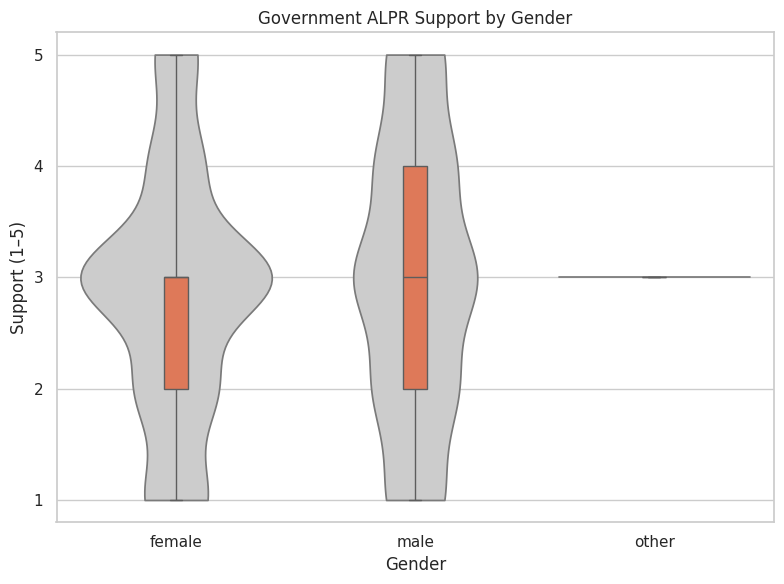

In [ ]:
plt.figure(figsize=(8, 6))

sns.violinplot(
    x='gender',
    y='support_gov_num',
    data=df,
    inner=None,
    color=".8",
    cut=0
)

sns.boxplot(
    x='gender',
    y='support_gov_num',
    data=df,
    whis=[0, 100],
    width=0.1,
    color="#f46d43"
)

plt.title("Government ALPR Support by Gender")
plt.xlabel("Gender")
plt.ylabel("Support (1–5)")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()


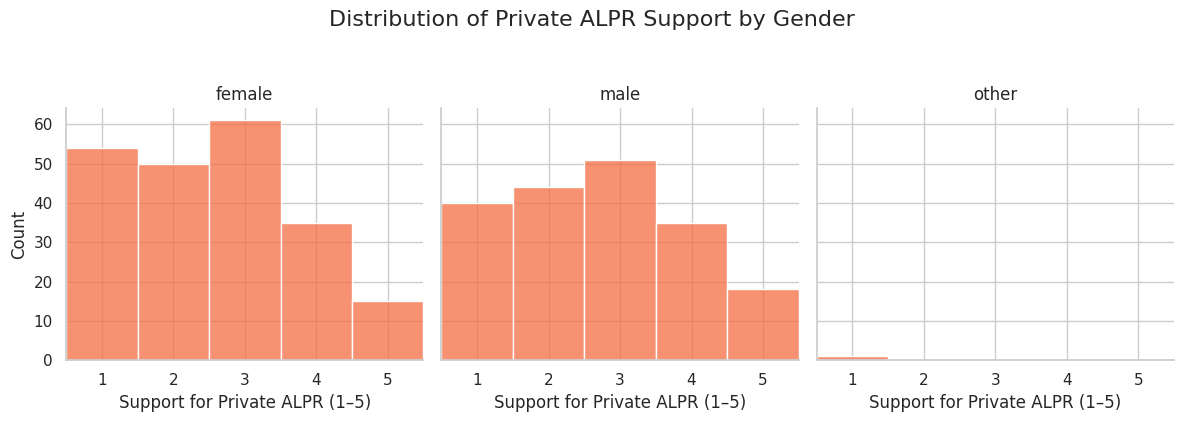

In [ ]:
sns.set(style="whitegrid")

g = sns.FacetGrid(df, col='gender', col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.histplot, 'support_private_num', bins=5, discrete=True, color="#f46d43")

g.set_titles("{col_name}")
g.set_axis_labels("Support for Private ALPR (1–5)", "Count")
g.set(xlim=(0.5, 5.5), xticks=[1, 2, 3, 4, 5])

plt.suptitle("Distribution of Private ALPR Support by Gender", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()


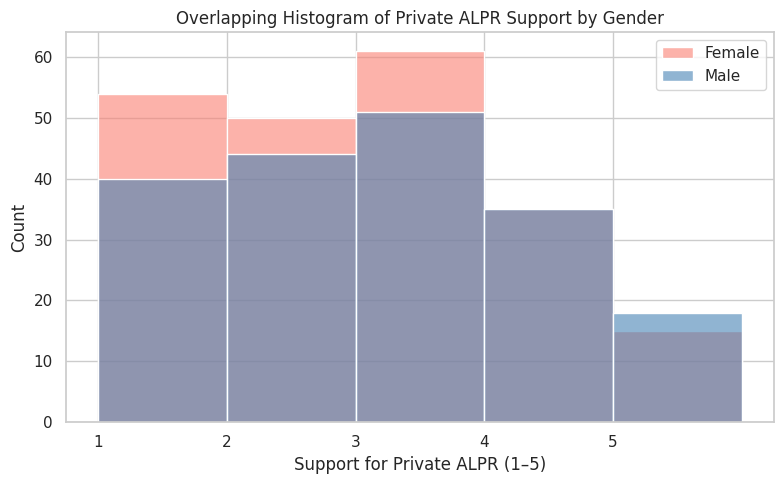

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(data=df[df['gender'] == 'female'], x='support_private_num',
             bins=[1, 2, 3, 4, 5, 6], color='salmon', label='Female', alpha=0.6)

sns.histplot(data=df[df['gender'] == 'male'], x='support_private_num',
             bins=[1, 2, 3, 4, 5, 6], color='steelblue', label='Male', alpha=0.6)

plt.title("Overlapping Histogram of Private ALPR Support by Gender")
plt.xlabel("Support for Private ALPR (1–5)")
plt.ylabel("Count")
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.tight_layout()
plt.show()


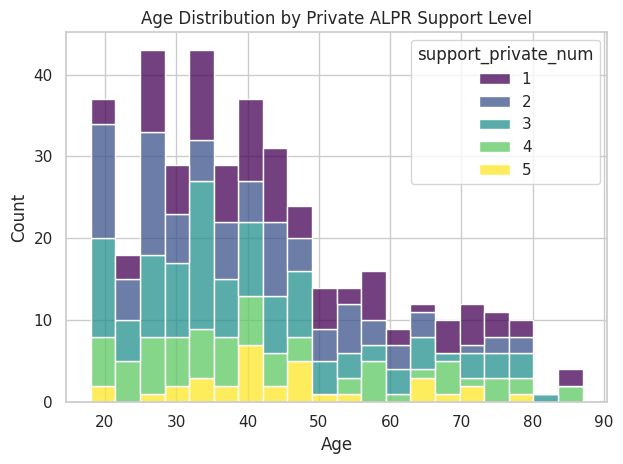

In [ ]:
# Hm... how useful is this

sns.histplot(
    data=df,
    x="age", hue="support_private_num", multiple="stack", bins=20,
    palette="viridis"
)
plt.title("Age Distribution by Private ALPR Support Level")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


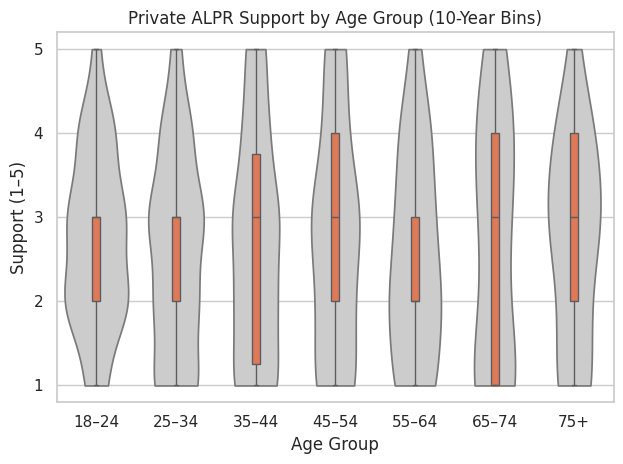

In [ ]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 90]
age_labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75+']

df['age_bucket'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
sns.violinplot(
    x='age_bucket', y='support_private_num',
    data=df, inner=None, color=".8", cut=0
)
sns.boxplot(
    x='age_bucket', y='support_private_num',
    data=df, whis=[0, 100], width=0.1, color="#f46d43"
)

plt.title("Private ALPR Support by Age Group (10-Year Bins)")
plt.xlabel("Age Group")
plt.ylabel("Support (1–5)")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

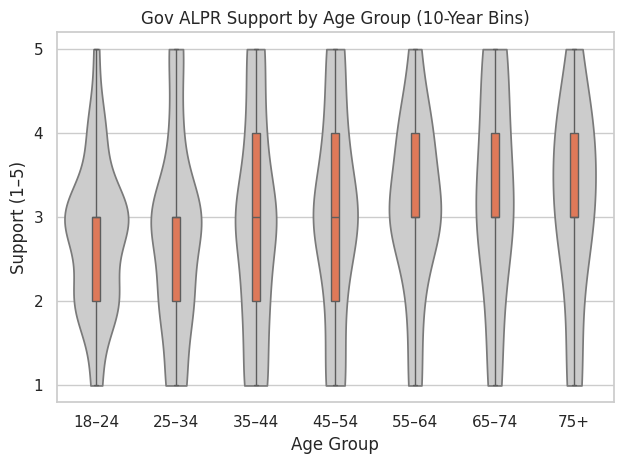

In [ ]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 90]
age_labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75+']

df['age_bucket'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
sns.violinplot(
    x='age_bucket', y='support_gov_num',
    data=df, inner=None, color=".8", cut=0
)
sns.boxplot(
    x='age_bucket', y='support_gov_num',
    data=df, whis=[0, 100], width=0.1, color="#f46d43"
)

plt.title("Gov ALPR Support by Age Group (10-Year Bins)")
plt.xlabel("Age Group")
plt.ylabel("Support (1–5)")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

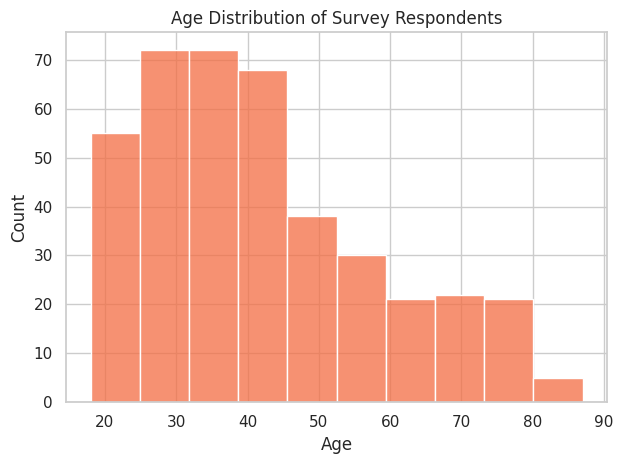

In [ ]:
sns.histplot(df['age'], bins=10, kde=False, color='#f46d43')
plt.title("Age Distribution of Survey Respondents")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
income_order = [
    'Less than $9,999',
    '$10,000 to $24,999',
    '$25,000 to $39,999',
    '$40,000 to $59,999',
    '$60,000 to $84,999',
    '$85,000 to $114,999',
    '$115,000 to $149,999',
    '$150,000 to $199,999',
    '$200,000 or more'
]

df['householdIncome'] = pd.Categorical(df['householdIncome'], categories=income_order, ordered=True)


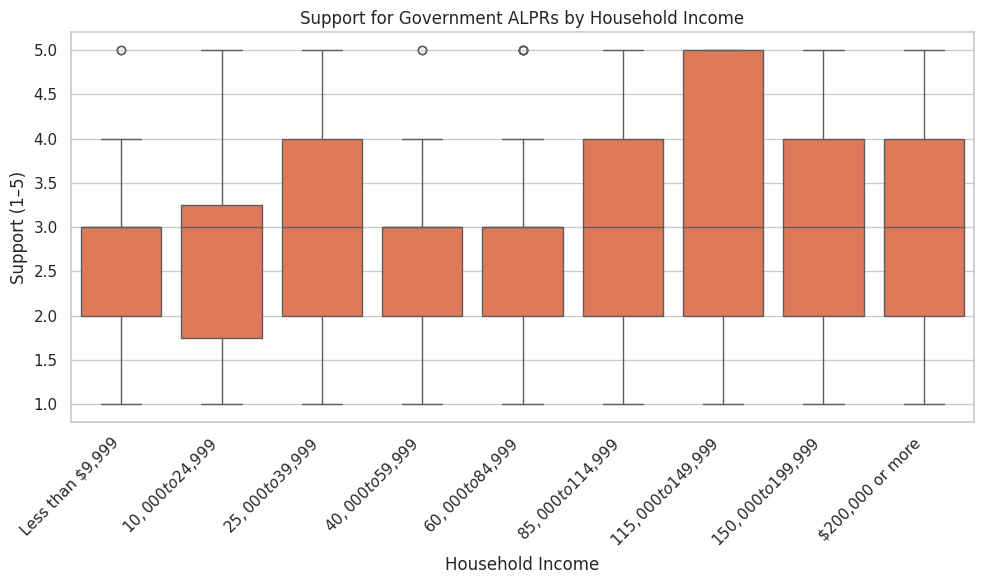

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='householdIncome', y='support_gov_num',
    data=df, order=income_order, color="#f46d43"
)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Household Income")
plt.ylabel("Support (1–5)")
plt.title("Support for Government ALPRs by Household Income")
plt.tight_layout()
plt.show()


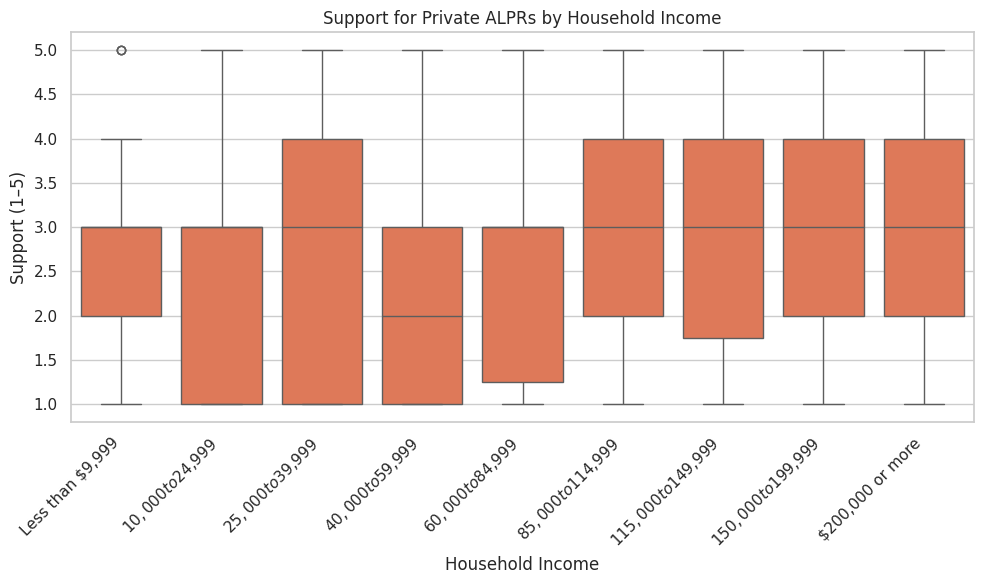

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='householdIncome', y='support_private_num',
    data=df, order=income_order, color="#f46d43"
)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Household Income")
plt.ylabel("Support (1–5)")
plt.title("Support for Private ALPRs by Household Income")
plt.tight_layout()
plt.show()


householdIncome
Less than $9,999        38
$10,000 to $24,999      28
$25,000 to $39,999      33
$40,000 to $59,999      53
$60,000 to $84,999      70
$85,000 to $114,999     61
$115,000 to $149,999    36
$150,000 to $199,999    44
$200,000 or more        41
Name: count, dtype: int64


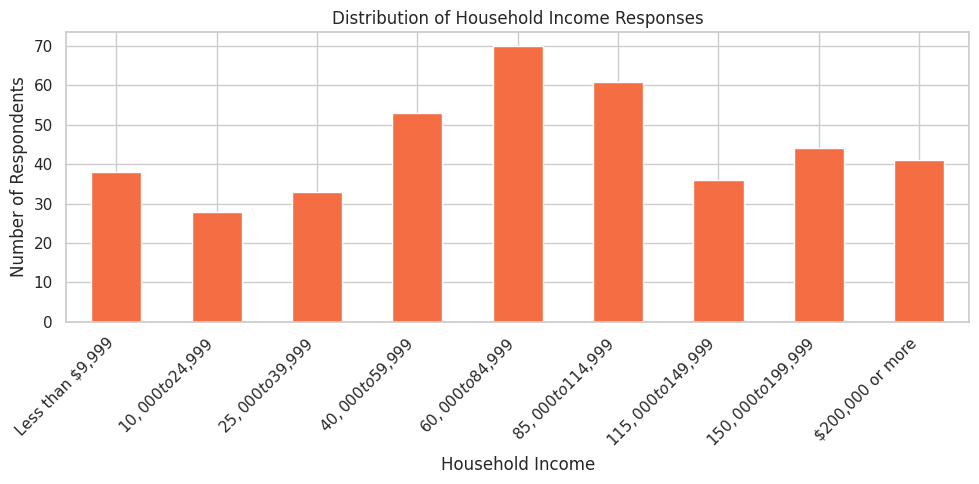

In [ ]:
# Count of respondents in each household income bracket
income_counts = df['householdIncome'].value_counts().sort_index()

print(income_counts)

plt.figure(figsize=(10, 5))
income_counts.plot(kind='bar', color='#f46d43')
plt.title('Distribution of Household Income Responses')
plt.xlabel('Household Income')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


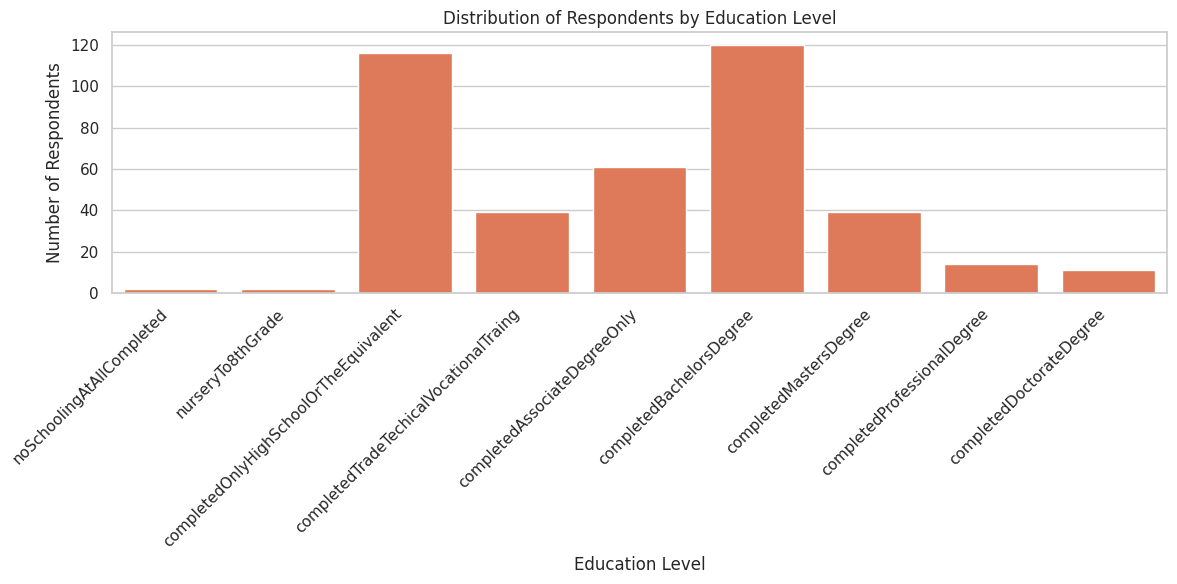

In [ ]:
# Define ordered categories for readability
education_order = [
    'noSchoolingAtAllCompleted',
    'nurseryTo8thGrade',
    'completedOnlyHighSchoolOrTheEquivalent',
    'completedTradeTechicalVocationalTraing',
    'completedAssociateDegreeOnly',
    'completedBachelorsDegree',
    'completedMastersDegree',
    'completedProfessionalDegree',
    'completedDoctorateDegree'
]

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', order=education_order, color='#f46d43')

plt.title('Distribution of Respondents by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


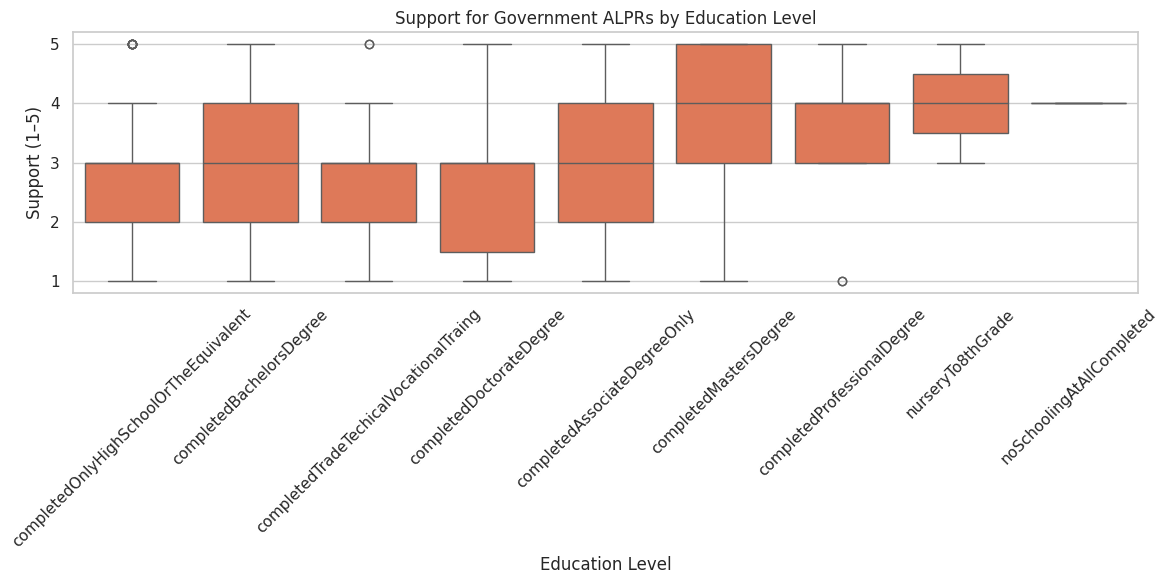

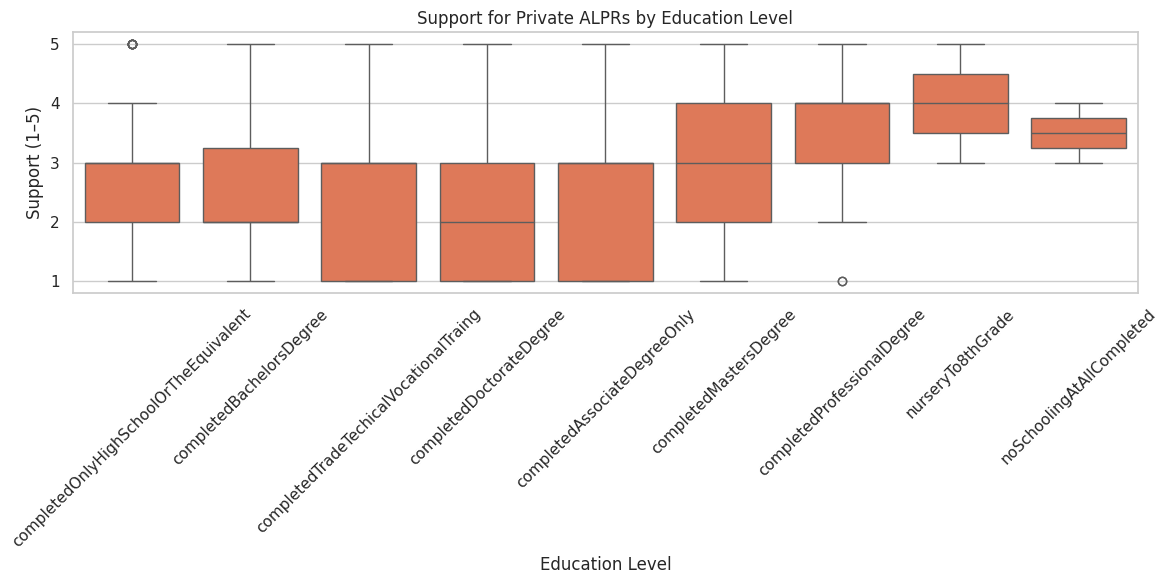

In [ ]:

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='education',
    y='support_gov_num',
    color='#f46d43'
)
plt.title("Support for Government ALPRs by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Support (1–5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Private ALPRs
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='education',
    y='support_private_num',
    color='#f46d43'
)
plt.title("Support for Private ALPRs by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Support (1–5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2977694706.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=race_df_long, x="Race", y=gov_support_col, palette="Set2")


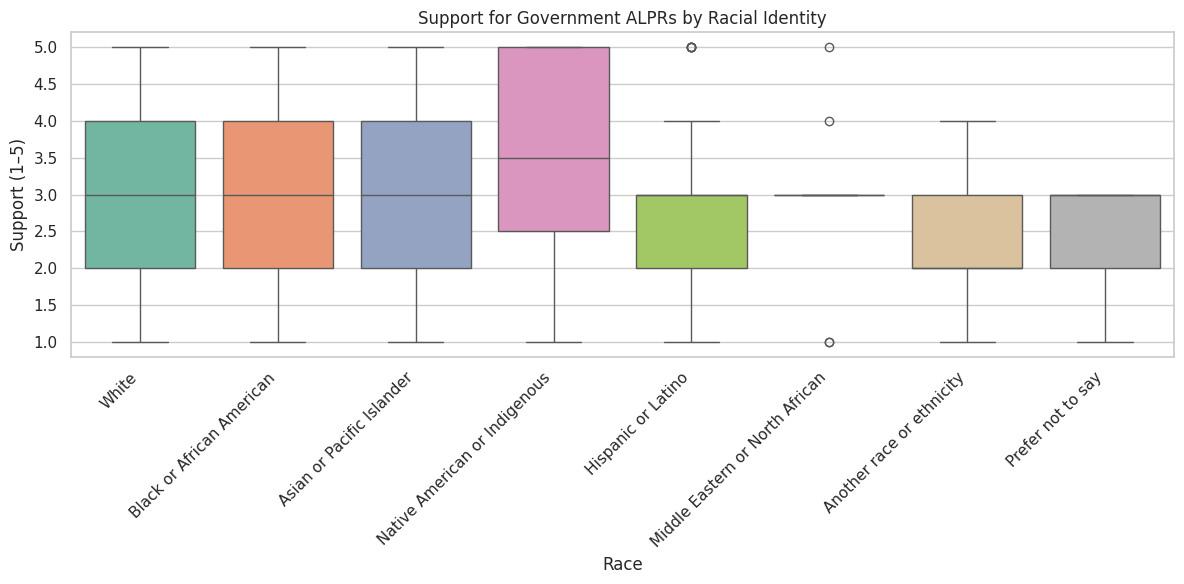

/tmp/ipython-input-2977694706.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=race_df_long, x="Race", y=priv_support_col, palette="Set2")


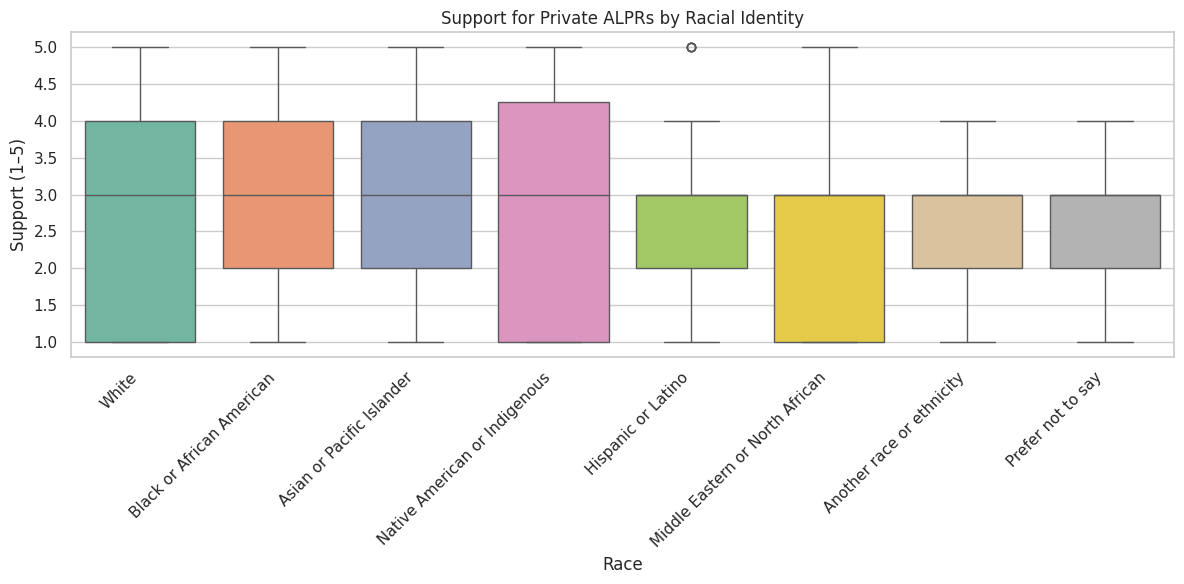

In [ ]:
race_col = "What is your race or ethnicity? (Select all that apply) (d8morv7)"
gov_support_col = "support_gov_num"   # Replace with actual column name
priv_support_col = "support_private_num" # Replace with actual column name

race_keywords = [
    "White", "Black or African American", "Asian or Pacific Islander",
    "Native American or Indigenous", "Hispanic or Latino",
    "Middle Eastern or North African", "Another race or ethnicity", "Prefer not to say"
]

for race in race_keywords:
    df[race] = df[race_col].str.contains(race, na=False)

race_df_long = df.melt(
    id_vars=[gov_support_col, priv_support_col],
    value_vars=race_keywords,
    var_name="Race",
    value_name="Selected"
)

race_df_long = race_df_long[race_df_long["Selected"] == True]

# Government ALPR Support
plt.figure(figsize=(12, 6))
sns.boxplot(data=race_df_long, x="Race", y=gov_support_col, palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.title("Support for Government ALPRs by Racial Identity")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()

# Private ALPR Support
plt.figure(figsize=(12, 6))
sns.boxplot(data=race_df_long, x="Race", y=priv_support_col, palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.title("Support for Private ALPRs by Racial Identity")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()


In [ ]:
race_col = "What is your race or ethnicity? (Select all that apply) (d8morv7)"

def categorize_race(value):
    if pd.isna(value):
        return 'Missing'
    races = value.split(",")
    if len(races) > 1:
        return "Multiracial"
    else:
        return races[0]

df['Race'] = df[race_col].apply(categorize_race)

df['Race'] = df['Race'].replace({
    'Prefer not to say': 'Prefer not to say',
    'Another race or ethnicity': 'Other',
    'Missing': 'Missing'
})

print("New Race categories:", df['Race'].value_counts())


New Race categories: Race
White                              106
Asian or Pacific Islander          105
Black or African American           57
Hispanic or Latino                  46
Multiracial                         45
Prefer not to say                   17
Other                               10
Missing                              7
Middle Eastern or North African      6
Native American or Indigenous        5
Name: count, dtype: int64


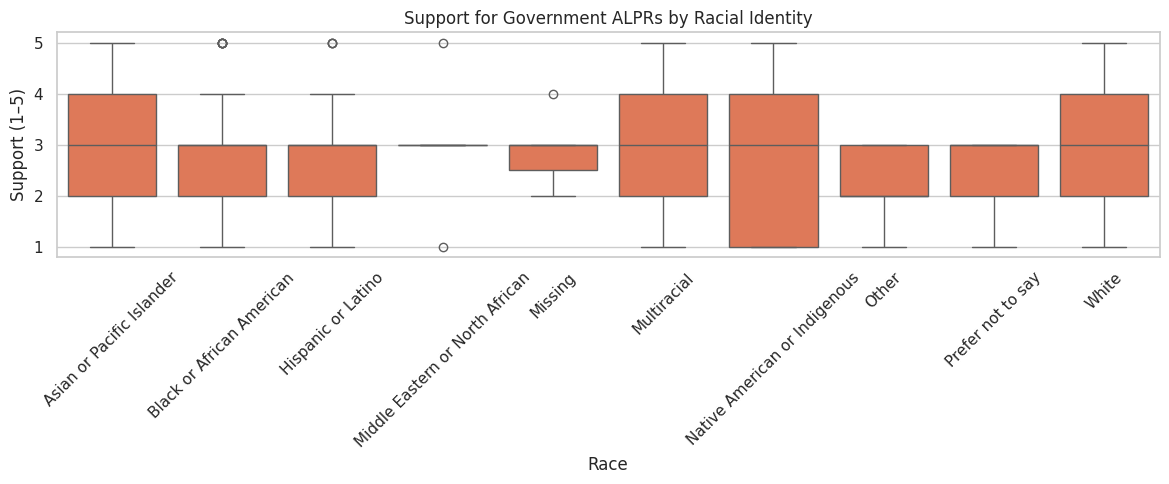

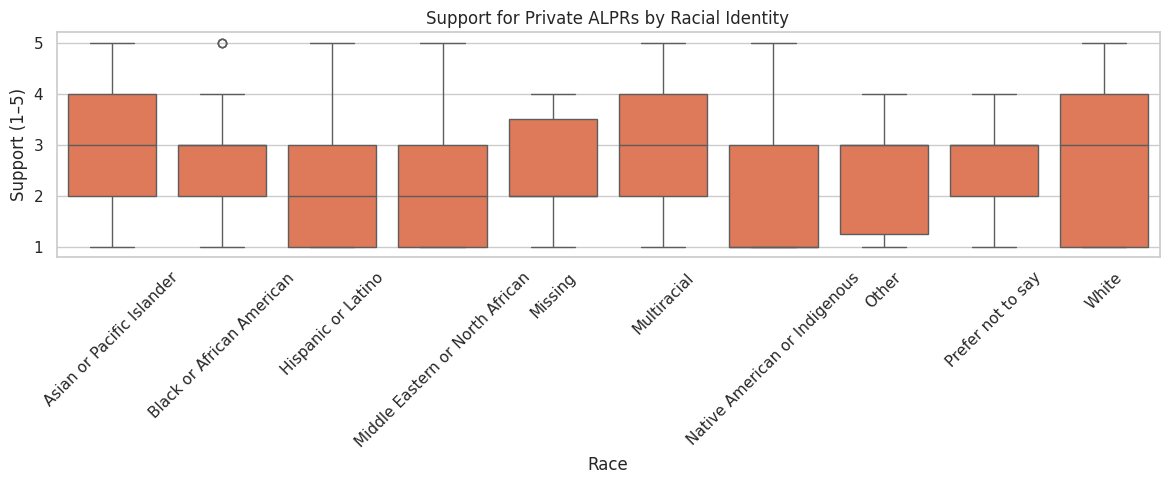

In [ ]:
# Government ALPR support boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(x='Race', y='support_gov_num', color="#f46d43", data=df, order=sorted(df['Race'].unique()))
plt.title("Support for Government ALPRs by Racial Identity")
plt.xlabel("Race")
plt.ylabel("Support (1–5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Private ALPR support boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(x='Race', y='support_private_num', color="#f46d43", data=df, order=sorted(df['Race'].unique()))
plt.title("Support for Private ALPRs by Racial Identity")
plt.xlabel("Race")
plt.ylabel("Support (1–5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


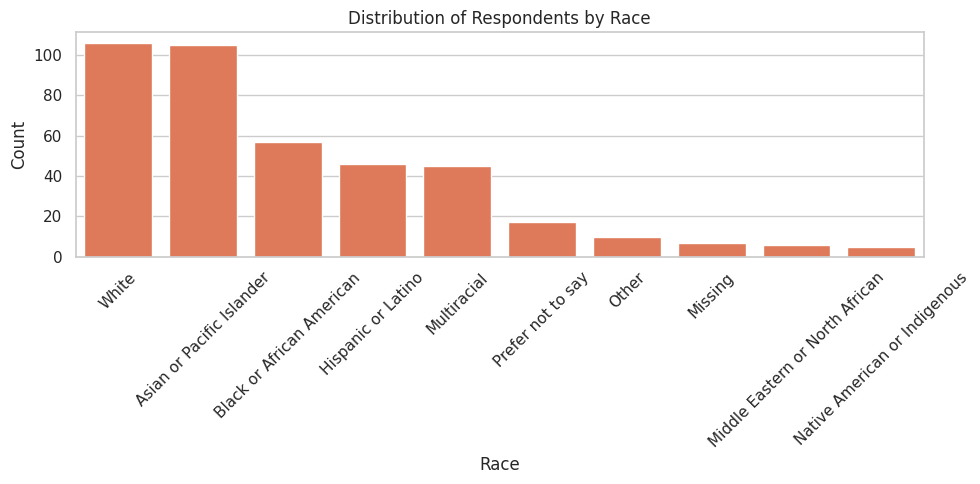

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Race', order=df['Race'].value_counts().index, color="#f46d43")

plt.title("Distribution of Respondents by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
